In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

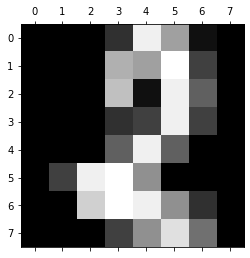

In [14]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.data[51].reshape(8,8))

In [15]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000

In [29]:
x = df
y = digits.target
x.shape

(1797, 64)

In [20]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=30)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)
model.score(x_test,y_test)*100

97.5

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95)            #retains 95% of information
x_pca = pca.fit_transform(x)
x_pca.shape                     # 64 columns reduced to 29 newly calculated columns

(1797, 29)

In [30]:
x_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [31]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [32]:
"""
here pc1 (1st principal component) captures 14% of variance/ useful info from the dataset and so on
"""
pca.n_components_

29

In [47]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [48]:
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)*100

95.55555555555556

In [51]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [53]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [54]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [55]:
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)*100

58.333333333333336